In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 读取图像
src_path = r"D:\MyProject\CV\CV2\pipes-4.jpg"
src = cv.imread(src_path)
if src is None:
    raise FileNotFoundError(f"Image not found at {src_path}")
 
# 转换为RGB并应用双边滤波
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
src = cv.bilateralFilter(src, 9, 75, 75)

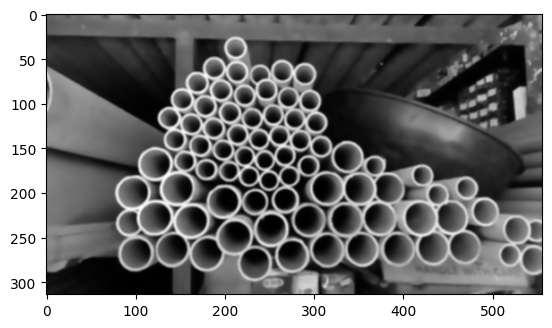

In [3]:
# 转换为灰度图并模糊处理 Преобразование в оттенки серого и размытие
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (3, 3))
plt.imshow(gray, cmap='gray')
plt.show()

Total pipes:  78


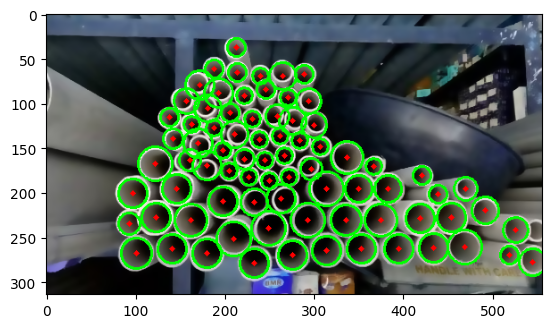

In [4]:
detected_circles = cv.HoughCircles(
    gray,
    cv.HOUGH_GRADIENT,
    dp=1.3,  # 累加器分辨率与图像分辨率的反比
    minDist=15,  # 检测圆心之间的最小距离
    param1=310,  # Canny边缘检测的高阈值
    param2=30,  # 圆心检测阈值，阈值越低，能检测到的圆越多
    minRadius=3,
    maxRadius=20
)

# 处理检测结果 Обработка результатов тестирования
image = src.copy()
pipes_count = 0

if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles)) 

    for points in detected_circles[0, :]:
        a, b, r = points[0] , points[1] , points[2] 

        cv.circle(image, (a, b), r, (0, 255, 0), 2)

        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1


print("Total pipes: ", pipes_count)
plt.imshow(image)
plt.show()